# Understanding unemployment in France 

Have you ever wondered where the numbers came from when politicians or the media talk about unemployment ? Being a subject of interest in Western countries, let's try to understand what is happening in terms of unemployment in France. For this, we have retrieved data from [data.gouv](https://www.insee.fr/fr/statistiques/3555153#consulter). 
They represent unemployment data in France in 2017.



## Description of the dataset 

Have a look at the description of the dataset [here](https://www.insee.fr/fr/statistiques/3555153#documentation)

* Import useful libraries
  * pandas 
  * numpy
  * matplotlib 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load the data from fdeec17.csv

In [4]:
df = pd.read_csv('src/fdeec17.csv')
df.head(5)


,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


In [5]:
df.shape

(428642, 126)

In [6]:
df.columns

Index(['Unnamed: 0', 'ANNEE', 'TRIM', 'CATAU2010R', 'METRODOM', 'TYPMEN7',
       'AGE3', 'AGE5', 'COURED', 'ENFRED',
       ...
       'DIP11', 'CSTOTPRM', 'IDENTM', 'EXTRIAN', 'EMPNBH', 'HREC', 'HHCE',
       'HPLUSA', 'JOURTR', 'NBTOTE'],
      dtype='object', length=126)

* By doing a [pie-chart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html), show the share of unemployed, inactive and employed persons in France (from the variable ACTEU). Make sure the following information is displayed : 

  * The percentage of each category 
  * A legend 

In [48]:
df.value_counts

<bound method DataFrame.value_counts of         Unnamed: 0  ANNEE  TRIM  CATAU2010R  METRODOM  TYPMEN7  AGE3  AGE5  \
0                0   2017     1           1         1        2    50    50   
1                1   2017     1           1         1        2    15    15   
2                2   2017     1           1         1        2    15    15   
3                3   2017     3           1         1        2    50    50   
4                4   2017     3           1         1        2    15    15   
...            ...    ...   ...         ...       ...      ...   ...   ...   
428637      428637   2017     2           1         2        3    50    50   
428638      428638   2017     3           1         2        3    50    60   
428639      428639   2017     3           1         2        3    50    50   
428640      428640   2017     4           1         2        3    50    60   
428641      428641   2017     4           1         2        3    50    50   

        COURED  ENFRED 

In [49]:
print(list(df.columns))


['Unnamed: 0', 'ANNEE', 'TRIM', 'CATAU2010R', 'METRODOM', 'TYPMEN7', 'AGE3', 'AGE5', 'COURED', 'ENFRED', 'NFRRED', 'SEXE', 'ACTEU', 'ACTEU6', 'ACTIF', 'ACTOP', 'AIDFAM', 'ANCCHOM', 'ANCINACT', 'CONTACT', 'CREACCP', 'DEM', 'DISPOC', 'GARDEB', 'HALOR', 'INSCONT', 'MRA', 'MRB', 'MRBBIS', 'MRC', 'MRD', 'MRDBIS', 'MRE', 'MREC', 'MRF', 'MRG', 'MRGBIS', 'MRH', 'MRI', 'MRJ', 'MRK', 'MRL', 'MRM', 'MRN', 'MRO', 'MRPASSA', 'MRPASSB', 'MRPASSC', 'MRS', 'NONDIC', 'NREC', 'NRECA', 'NRECB', 'OCCREF', 'OFFICC', 'OFFRE', 'PASTRA', 'PASTRB', 'PASTRF', 'PERCREV', 'RABS', 'RAISNREC', 'RAISNSOU', 'RAISPAS', 'SOU', 'SOUA', 'SOUB', 'SOUC', 'SOUSEMPL', 'STCHE', 'TEMP', 'TRAREF', 'TYPCONT', 'TYPCONTB', 'CHPUB', 'CSE', 'CSER', 'CSP', 'CSTOT', 'CSTOTR', 'FONCTC', 'NAFG004UN', 'NAFG010UN', 'NAFG017UN', 'NAFG021UN', 'NAFG038UN', 'NAFG088UN', 'PUB3FP', 'QPRC', 'STC', 'CONTRA', 'RDET', 'STAT2', 'STATOEP', 'STATUT', 'STATUTR', 'TITC', 'CSTMN', 'CSTPLC', 'DISPPLC', 'DUHAB', 'GARDEA', 'HHC6', 'HORAIC', 'RAISON', 'RAIST

In [50]:
#focus sur la variable ACTEU, repartition chomeur inactif  actifs
df['ACTEU'].unique()


array([ 1.,  3.,  2., nan])

In [51]:
chomeurs = df['ACTEU'].apply(lambda x:
                               "Actif Occupé" if x==1
                               else "Chômeur" if x == 2
                               else "Inactif" if x==3
                               else "NAN")
chomeurs.value_counts()
cho = chomeurs.value_counts()


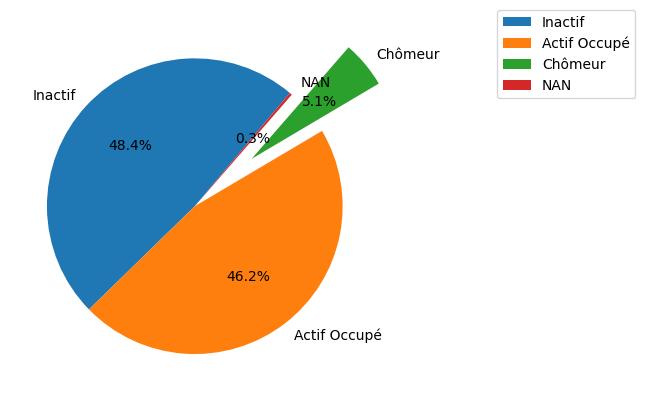

In [69]:
#labels = 'Inactif', 'Actif Occupé', 'Chômeur', 'NAN' --> cho à la place je crée une variable cho, qui est le value count de la variable chomeurs
#sizes = [207520, 198054, 21864, 1204]               --> labels= cho.index ( ça me retourne les colonnes de mon nv dataframe cho)

plt.pie(cho, labels=cho.index, autopct='%1.1f%%',explode = (0,0,0.5,0), startangle=50
)

plt.legend(bbox_to_anchor=(1.3, 1.05))

plt.show()

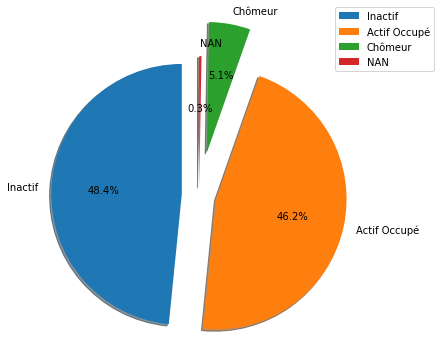

---> The unemployment figure seems low and, if we look at the explanation of the *inactive*, it seems to include a lot of people (students, people not looking for work, etc.).

* Make the same graph on the variable ACTEU6 which is more precise on the type of actives.

In [53]:
#focus sur la variable ACTEU, repartition chomeur inactif  actifs
df['ACTEU6'].unique()

array([ 1.,  6.,  3.,  5., nan,  4.])

In [57]:
acteu6 =df['ACTEU6'].apply(lambda x:
                               "Actif Occupé" if x==1
                               else "Autres inactifs (dont retraités)" if x==6
                               else "Chômeur PSERE" if x==3
                               else "Etudiant, élève, stagiaire en formation" if  x==5
                               else "Autre chômeur BIT" if x==4
                               else "NAN")
acteu6.value_counts()
ac6 = acteu6.value_counts()



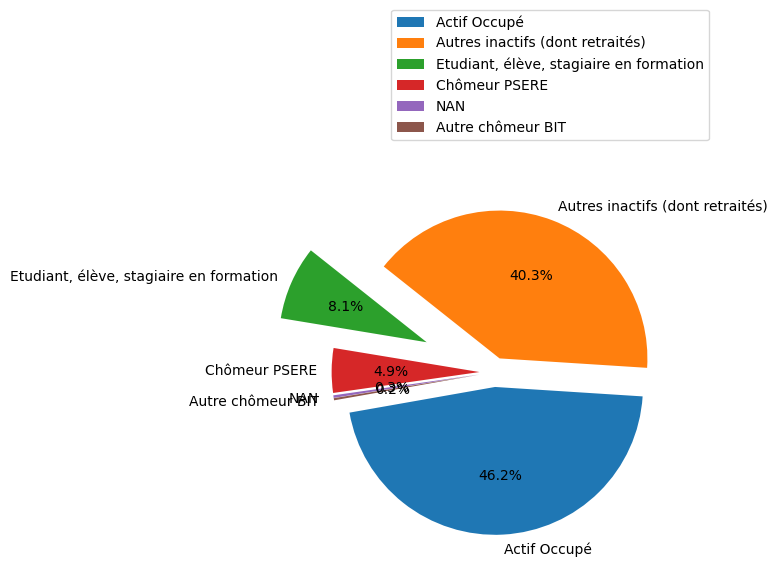

In [80]:
plt.pie(ac6, labels=ac6.index, autopct='%1.1f%%',explode = (0.1,0.1,0.5,0.1,0.1,0.1), startangle=190
        
)
plt.legend(bbox_to_anchor=(1.1, 1.5))

plt.show()

* By ploting a [stacked bar chart](https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html), compare :

  * The ratio *chômeurs* / *Actifs occupés* 
  * The ratio *chômeurs* / *Actifs occupés + Inactifs*

In [ ]:
#j'assigne des noms à des valeurs numeriques selon le glossaire de la documentation

In [74]:
chomeurs = df['ACTEU'].apply(lambda x:
                               "Actif Occupé" if x==1
                               else "Chômeur" if x == 2
                               else "Inactif" if x==3
                               else "NAN")

In [81]:
cho = chomeurs.value_counts()
# jaffiche le nombre de fois ou les valeurs apparaissent dans mon dataset

Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64

In [82]:
cho.index

Index(['Inactif', 'Actif Occupé', 'Chômeur', 'NAN'], dtype='object', name='ACTEU')

In [99]:
#ratio chomeurs / actif occupés

calcul1 = cho[2]/cho[1]
calcul1




/var/folders/58/1g58gkyn5gg8gxkls_r08wqc0000gn/T/ipykernel_92713/1577707357.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calcul1 = cho[2]/cho[1]


0.11039413493289708

In [88]:
#ratio chomeurs / actif occupés + inactifs

calcul2 = cho [2]/(cho [1] + cho[0])
calcul2

/var/folders/58/1g58gkyn5gg8gxkls_r08wqc0000gn/T/ipykernel_92713/2032339856.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calcul2 = cho [2]/(cho [1] + cho[0])


0.05390878113488537

In [115]:
rapportdechomeurs = [calcul1,calcul2]
rapportdechomeurs

[0.11039413493289708, 0.05390878113488537]

In [116]:
print("le rapport de chomeurs est de : {}".format(rapportdechomeurs) )

le rapport de chomeurs est de : [0.11039413493289708, 0.05390878113488537]


In [16]:
#ok 

['Chômeurs / Actifs Occupés', 'Chômeurs / Actifs + Inactifs']

In [124]:
rapportsdactifs = np.array([1,1]) - rapportdechomeurs
print("Rapports d'actifs est de {}".format(rapportsdactifs))

Rapports d'actifs est de [0.88960587 0.94609122]


In [113]:
#stack bar chart
# Stacked bar plot





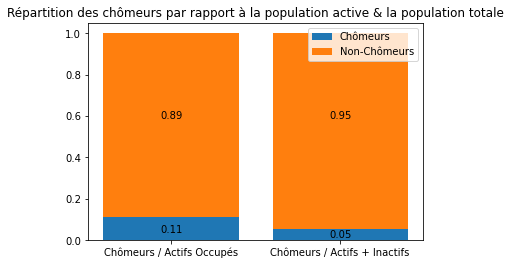

It seems that we were 11% unemployed among the active (working) population in France in 2017 according to the ILO.

* By creating a [*bar chart*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) again, this time look at the distribution of unemployment seniority. The name of the variable is ANCCHOM

NAN                                 406904
3 ans ou plus                         3906
De 6 mois à moins d'un an             3648
De 1 an à moins d'un an et demi       3398
De 1 mois à moins de 3 mois           3270
De 3 mois à moins de 6 mois           3193
De 2 ans à moins de 3 ans             2289
De 1 an et demi à moins de 2 ans      1132
Moins d'un mois                        902
Name: ANCCHOM, dtype: int64

<BarContainer object of 8 artists>

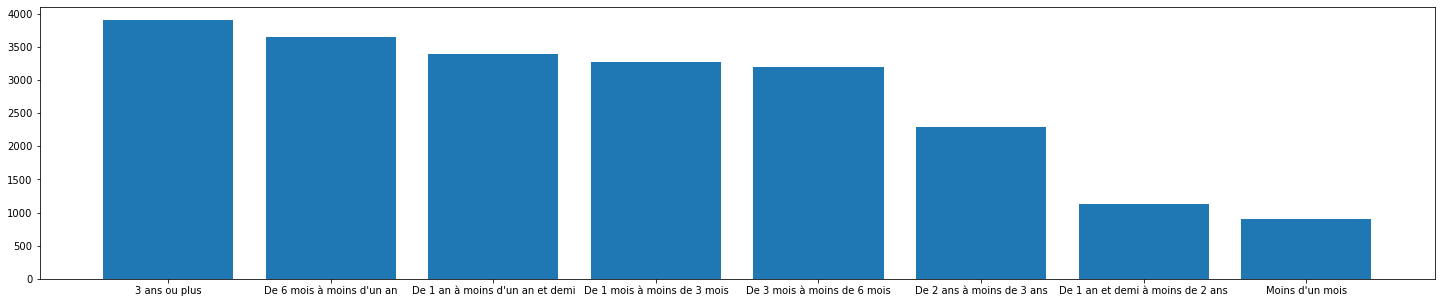

* The distribution doesn't look good on the bar chart, try doing it again on a piechart. 

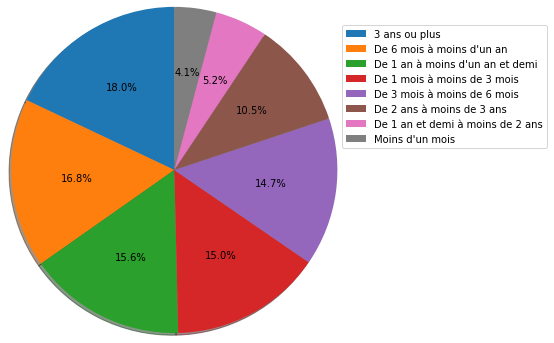

* It would be interesting to see the distribution of people registered with Pôle Emploi or an employment agency among these unemployed people. Look at this distribution thanks to the CONTACT column 
  * Directly remove the NaN from your chart

NAN    399514
Non     15984
Oui     13144
Name: CONTACT, dtype: int64

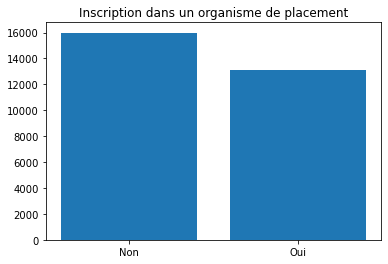

* Regardons ce qui pousse les français à changer d'emploi, grâce à la colonne CREACCP, crééz un bar chart horizontale qui va permettre de connaitre les principales raisons de changement d'emploi des français. 

Doit ou veut déménager                                                                   216
Veut s'installer à son compte                                                            354
Désire diminuer son temps de transport                                                   598
Désire un travail avec un rythme horaire plus adapté ou plus modulable                  1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles          1223
Veut changer de métier ou de secteur                                                    1392
Veut travailler plus d'heures                                                           1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)      1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé             1820
Veut un emploi plus stable (CDI)                                                        2462
Désire un emploi plus intéressant                                     

21707


[1.0, 1.63, 2.75, 5.08, 5.63, 6.41, 6.47, 7.29, 8.38, 11.34, 12.8, 31.21]

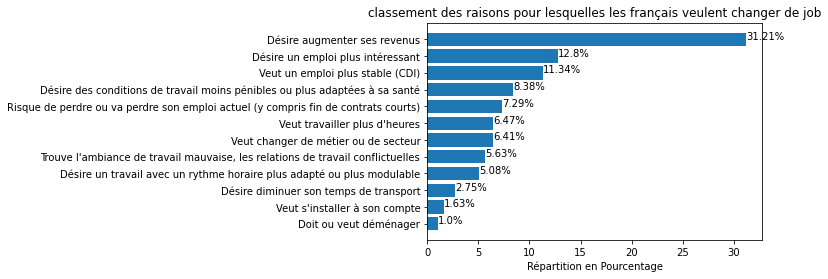

* Let's end this exercise by looking at the distribution of desired hours for those looking for part-time work. To do this, use the HREC column. 

  * First try to simply create a histogram without the density function. 
  * To create the density function, you will need to use the following formula: 
      ```y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))```
     
     where *mu* is the mean of the distribution and *sigma* is the standard deviation.  You can help yourself with this tutorial [histogram with Density](https://matplotlib.org/3.1.1/gallery/statistics/histogram_features.html)

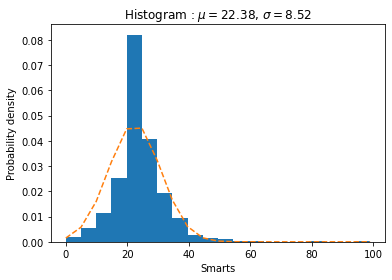